# Machine-learning analysis - Balanced dataset - All patients - Only Clusters - p-value < 0.05

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [3]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [4]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_p005 = pd.read_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_VARIANTCLASS_afterMutCLust_ONLYclusters_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.set_index(occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# SELECT THE PATIENTS

# Extract the row indices as a list
total_patient_indices = occurrence_matrix_TNandNONTN_relgenes_p005.index.tolist()
# Create a new DataFrame with the patient indices
total_patient_indices = pd.DataFrame({'Patient': total_patient_indices})
total_patient_indices

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_010
3,brca_smc_2018_BB01_013
4,brca_smc_2018_BB01_014
...,...
829,MBCProject_rYSXcxcV
830,MBCProject_rvULI3TV
831,MBCProject_xBfJfri9
832,MBCProject_xoHAF6s8


### Study the intersection between these patients and the TN only cluster test patients (p<0.05)

In [6]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyclusters_TN_test_pts_p005 = pd.read_csv('Test_TNandNONTNpatients_only_clusters_p_005.txt', sep=',', engine='python')
onlyclusters_TN_test_pts_p005

,Patient
0,TCGA-B6-A401
1,TCGA-B6-A0X5
2,TCGA-A2-A0D0
3,TCGA-A2-A0CL
4,TCGA-D8-A142
...,...
65,brca_smc_2018_BR371
66,brca_smc_2018_BB01_017
67,TCGA-A7-A0DB
68,brca_smc_2018_BB01_126


In [7]:
pd.merge(total_patient_indices, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_110
3,brca_smc_2018_BB01_119
4,brca_smc_2018_BB01_126
...,...
65,MBC_204
66,MBCProject_LVSjf8h7
67,MBCProject_d5CbUNTb
68,MBCProject_oqupfDu7


All the patients in the onlyclusters dataset are present in the dataset under interest.

In [8]:
occurrence_matrix_TNandNONTN_relgenes_p005.sum().sum()

1277

In [9]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()
columns_with_all_zeros

0

In [10]:
(occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [11]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_p005[['Target']]
patient_target

,Target
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_010,0
brca_smc_2018_BB01_013,0
brca_smc_2018_BB01_014,0
...,...
MBCProject_rYSXcxcV,0
MBCProject_rvULI3TV,0
MBCProject_xBfJfri9,0
MBCProject_xoHAF6s8,0


In [12]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_p005.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278


There aren't patients with zero mutations.

In [14]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_p005['Target'].value_counts()

In [15]:
class_count_0

690

In [16]:
class_count_1

144

In [17]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (690, 107)
Target 1 - TN: (144, 107)


In [18]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [19]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_010
2,brca_smc_2018_BB01_013
3,brca_smc_2018_BB01_014
4,brca_smc_2018_BB01_016
...,...
685,MBCProject_rYSXcxcV
686,MBCProject_rvULI3TV
687,MBCProject_xBfJfri9
688,MBCProject_xoHAF6s8


### Select the patients that you do not want to discard when balancing the datasets.

In [20]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_130
2,brca_smc_2018_BR371
3,X11BR011
4,X11BR014
5,X21BR002
6,TCGA-A1-A0SI
7,TCGA-A2-A0CL
8,TCGA-A2-A0EQ
9,TCGA-A2-A0YH


In [21]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A1FU',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E9-A1R0',
 'MBC_128',
 'MBC_72',
 'MBC_183',
 'MBC_199',
 'MBCProject_LVSjf8h7',
 'MBCProject_pktAIxFb']

### Select the occurrence matrix associated to these 35 NON TN patients 

In [22]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix=NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
0,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
686,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
687,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
688,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
# extract the 35 TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
0,brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,X11BR011,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,X11BR014,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,X21BR002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,TCGA-A2-A0YH,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR011,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR014,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X21BR002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YH,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create the NON TN occurrence matrix without the 35 patients to keep

In [25]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list)]
class_0_new

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
0,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
686,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
687,MBCProject_xBfJfri9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
688,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_041
3,brca_smc_2018_BB01_059
4,brca_smc_2018_BB01_067
...,...
139,MBCProject_d5CbUNTb
140,MBCProject_epUYsdCE
141,MBCProject_lQtMtjFR
142,MBCProject_oqupfDu7


In [28]:
TN_pts_tokeep= pd.merge(TN_patient_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_119
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BR145
5,PD4133a
6,X18BR002
7,X20BR008
8,TCGA-A2-A0D0
9,TCGA-AC-A6IW


In [29]:
TN_pts_tokeep_list = TN_pts_tokeep['Patient'].tolist()
TN_pts_tokeep_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR145',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7']

In [30]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list
total_pts_to_keep

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR145',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 

In [31]:
len(total_pts_to_keep)

70

##  Random Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [32]:
# 35 patients are fixed. Extract randomly 109 patients. (109+35=144)
class_0_under = class_0_new.sample(109, random_state=123) # used for random sampling 
class_0_under.set_index('Patient', inplace=True)
class_0_under.index.name = None
class_0_under

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR031,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E9-A22E,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1X5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = pd.concat([class_0_under, class_1, NONTN_patients_tokeep_occ_matrix2], axis=0)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,TBX3_Splice_Site_210_218,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,RCC2_Missense_Mutation_271_278,RCC2_Nonsense_Mutation_271_278,Target
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    144
1    144
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

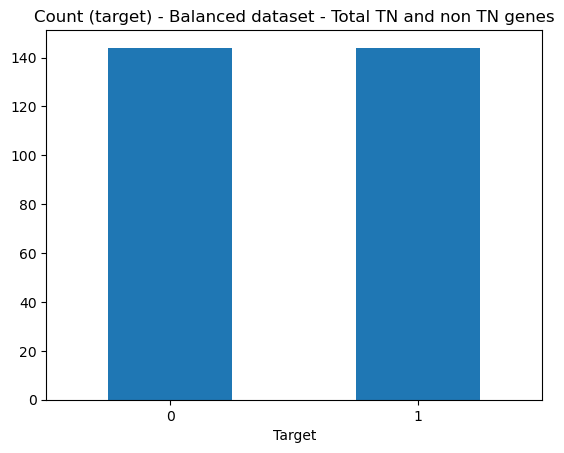

In [34]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [35]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         39
MAML3_In_Frame_Ins_503_503              3
PIK3CA_Missense_Mutation_1046_1047     57
TP53_Missense_Mutation_173_177         20
TP53_Missense_Mutation_236_258         39
                                     ... 
DAP3_Splice_Region_331_331              1
FAM193A_Silent_1170_1214                1
RCC2_Missense_Mutation_271_278          0
RCC2_Nonsense_Mutation_271_278          0
Target                                144
Length: 107, dtype: int64

In [36]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [37]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
                                      ...  
DAP3_Splice_Region_331_331            False
FAM193A_Silent_1170_1214              False
RCC2_Missense_Mutation_271_278         True
RCC2_Nonsense_Mutation_271_278         True
Target                                False
Length: 107, dtype: bool

In [38]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all().sum()

29

There are 29 columns containing all zero values.

In [39]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.eq(0).all()]
columns_to_drop

Index(['ABCG2_Frame_Shift_Del_22_32', 'GATA3_Frame_Shift_Del_406_408',
       'OR4D10_Missense_Mutation_175_183', 'CTCF_Missense_Mutation_283_288',
       'NUP93_Missense_Mutation_14_15', 'TBX3_In_Frame_Del_210_218',
       'DNAH14_Silent_143_288', 'DMXL2_Missense_Mutation_1709_1740',
       'FAM193A_Frame_Shift_Del_1170_1214', 'MAP4K3_Missense_Mutation_395_415',
       'FOXA1_Nonsense_Mutation_254_268', 'FOXA1_Frame_Shift_Del_254_268',
       'PIK3CA_Silent_1046_1047', 'TBX3_Frame_Shift_Ins_210_218',
       'GATA3_Missense_Mutation_308_335', 'TP53_Nonsense_Mutation_270_282',
       'MAP4K3_Silent_395_415', 'NOTCH2_Frame_Shift_Ins_2297_2303',
       'RUNX1_Missense_Mutation_122_123', 'ABCG2_Silent_22_32',
       'NUP93_Nonsense_Mutation_14_15', 'PIK3CA_In_Frame_Ins_102_113',
       'TBX3_In_Frame_Ins_210_218', 'CTCF_In_Frame_Ins_283_288',
       'FAM208B_Frame_Shift_Ins_805_805', 'ZNF814_Missense_Mutation_303_311',
       'TBX3_Splice_Site_210_218', 'RCC2_Missense_Mutation_271_278',
  

In [40]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_BALANCED_VARIANTCLASS_afterMutClust_onlyClusters.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

### Manually split the data in training set and test set 

In [43]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
# consider the balanced occurrence matrix without the 70 pts I want to keep
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(total_pts_to_keep)]
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
# select the Triple Negative patients
TN_balanced_occ_matrix = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection['Target'] == 1]
TN_balanced_occ_matrix

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_109,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
# select the Non Triple Negative patients 
NONTN_balanced_occ_matrix = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection['Target'] == 0]
NONTN_balanced_occ_matrix

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR031,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E9-A22E,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A1X5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# select one TN patient
random_TN_patients_balanced = TN_balanced_occ_matrix.loc['BR-M-045']
random_TN_patients_balanced = pd.DataFrame(random_TN_patients_balanced).T
random_TN_patients_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# select one NON TN patient
random_NONTN_patients_balanced = NONTN_balanced_occ_matrix.loc['X01BR015']
random_NONTN_patients_balanced = pd.DataFrame(random_NONTN_patients_balanced).T
random_NONTN_patients_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Combine the two random samples to create the final dataset
random_tot_pts_balanced = pd.concat([random_TN_patients_balanced, random_NONTN_patients_balanced])
random_tot_pts_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
specific_TNandNONTN_pts_balanced = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(total_pts_to_keep)]
specific_TNandNONTN_pts_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
total_test_pts_occ_matrix_balanced = pd.concat([random_tot_pts_balanced, specific_TNandNONTN_pts_balanced])
total_test_pts_occ_matrix_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [53]:
y_test = total_test_pts_occ_matrix_balanced['Target']
y_test

BR-M-045                  1
X01BR015                  0
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_119    1
                         ..
MBC_72                    0
MBC_183                   0
MBC_199                   0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 72, dtype: int64

In [54]:
X_test = total_test_pts_occ_matrix_balanced.drop('Target', axis=1)
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
test_pts_list = total_test_pts_occ_matrix_balanced.index.tolist()
test_pts_list

['BR-M-045',
 'X01BR015',
 'brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR145',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH

In [56]:
total_training_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(test_pts_list)]
total_training_pts_occ_matrix_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214,Target
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
y_train = total_training_pts_occ_matrix_balanced['Target']
y_train

MBC_17                 0
brca_smc_2018_BR135    0
PD4938a                0
TCGA-BH-A0DG           0
MBC_52                 0
                      ..
MBCProject_JpCASlSG    1
MBCProject_QJFdf8hQ    1
MBCProject_epUYsdCE    1
MBCProject_lQtMtjFR    1
MBCProject_rJHBiKTl    1
Name: Target, Length: 216, dtype: int64

In [58]:
X_train = total_training_pts_occ_matrix_balanced.drop('Target', axis=1)
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
MBC_17,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR135,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4938a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0DG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_52,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
training_pts_list = total_training_pts_occ_matrix_balanced.index.tolist()
training_pts_list

['MBC_17',
 'brca_smc_2018_BR135',
 'PD4938a',
 'TCGA-BH-A0DG',
 'MBC_52',
 'PD4935a',
 'TCGA-C8-A135',
 'TCGA-BH-A0DT',
 'TCGA-E2-A570',
 'X05BR009',
 'TCGA-E2-A14Z',
 'brca_smc_2018_BB01_036',
 'X18BR009',
 'TCGA-BH-A5J0',
 'brca_smc_2018_BR170',
 'X22BR006',
 'MBC_138',
 'TCGA-AR-A0TR',
 'TCGA-C8-A274',
 'TCGA-BH-A0BC',
 'brca_smc_2018_BB01_046',
 'MBCProject_jmfDfEs8',
 'TCGA-E2-A10B',
 'BR-M-036',
 'X18BR016',
 'MBCProject_GKu6TliY',
 'TCGA-A8-A092',
 'MBCProject_kzuMSZIW',
 'TCGA-C8-A26Y',
 'MBC_36',
 'X11BR058',
 'TCGA-C8-A278',
 'TCGA-BH-A1ET',
 'BR-V-037',
 'TCGA-AR-A1AP',
 'TCGA-GM-A2DN',
 'PD4108a',
 'TCGA-BH-A202',
 'MBCProject_9RtxtGUO',
 'TCGA-A2-A0EM',
 'MBC_29',
 'TCGA-BH-A0HN',
 'MBC_123',
 'TCGA-AR-A1AS',
 'TCGA-A8-A081',
 'TCGA-E9-A226',
 'X20BR006',
 'TCGA-EW-A1OZ',
 'BR-V-034',
 'TCGA-BH-A0BF',
 'TCGA-AO-A12A',
 'MBCProject_B7f5hRfD',
 'MBCProject_4MF1FlFQ',
 'TCGA-A2-A0CW',
 'MBC_34',
 'MBCProject_WzU1HEsr',
 'MBC_209',
 'brca_smc_2018_BR307',
 'X11BR022',
 'MBCPr

In [60]:
# sum each column
X.sum(axis=0)

TP53_Missense_Mutation_270_282        39
MAML3_In_Frame_Ins_503_503             3
PIK3CA_Missense_Mutation_1046_1047    57
TP53_Missense_Mutation_173_177        20
TP53_Missense_Mutation_236_258        39
                                      ..
RBM27_Frame_Shift_Del_719_719          1
NUP153_In_Frame_Del_1299_1299          1
ZNF19_Frame_Shift_Ins_280_280          1
DAP3_Splice_Region_331_331             1
FAM193A_Silent_1170_1214               1
Length: 77, dtype: int64

In [61]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y

MBC_17                 0
brca_smc_2018_BR135    0
PD4938a                0
TCGA-BH-A0DG           0
MBC_52                 0
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 288, dtype: int64

In [62]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['PIK3CA_Missense_Mutation_102_113', 'DNAH14_Intron_143_288',
       'TBX3_Frame_Shift_Del_210_218'],
      dtype='object')

In [63]:
len(X_train.columns[(X_train == 0).all(axis=0)])

3

There are 3 columns in the training dataset with just 0 values. 

In [64]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['MAML3_In_Frame_Ins_503_503', 'GATA3_Frame_Shift_Ins_308_335',
       'ERBB2_Missense_Mutation_767_777', 'GATA3_Frame_Shift_Ins_406_408',
       'DNAH14_Missense_Mutation_143_288', 'GATA3_Frame_Shift_Ins_429_434',
       'GATA3_Frame_Shift_Del_429_434', 'PTEN_Frame_Shift_Del_317_318',
       'TP53_Frame_Shift_Del_191_199', 'GATA3_Frame_Shift_Del_308_335',
       'DDX5_Missense_Mutation_134_141', 'TP53_In_Frame_Del_191_199',
       'TP53_Silent_270_282', 'NOTCH2_Frame_Shift_Del_2297_2303',
       'FOXA1_Missense_Mutation_254_268', 'ZNF208_Missense_Mutation_548_549',
       'TP53_Nonsense_Mutation_236_258', 'TP53_In_Frame_Del_173_177',
       'TP53_Frame_Shift_Del_270_282', 'PIK3R1_In_Frame_Ins_566_578',
       'ZNF716_Missense_Mutation_294_294', 'TP53_Frame_Shift_Del_173_177',
       'FGFR2_Missense_Mutation_549_549', 'ESR1_Missense_Mutation_380_380',
       'PIK3R1_In_Frame_Del_566_578', 'TP53_Silent_236_258',
       'TP53_Nonsense_Mutation_173_177', 'MTMR12_Silent_520_521',
   

In [66]:
len(X_test.columns[(X_test == 0).all(axis=0)])

51

There are 51 columns in the test dataset with just zero values.

In [67]:
y_train.value_counts()

Target
0    108
1    108
Name: count, dtype: int64

In [68]:
y_test.value_counts()

Target
1    36
0    36
Name: count, dtype: int64

In [69]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [70]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
MBC_17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4938a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0DG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

3

3 columns contain NaN values, that are the columns with all zero values in the training set.

In [72]:
np.isinf(normalized_X_train).any().any()

False

In [73]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
MBC_17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4938a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0DG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_52,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_JpCASlSG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
normalized_X_train.isna().any().any()

False

In [75]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        28.0
MAML3_In_Frame_Ins_503_503             3.0
PIK3CA_Missense_Mutation_1046_1047    40.0
TP53_Missense_Mutation_173_177        10.0
TP53_Missense_Mutation_236_258        16.0
                                      ... 
RBM27_Frame_Shift_Del_719_719          1.0
NUP153_In_Frame_Del_1299_1299          1.0
ZNF19_Frame_Shift_Ins_280_280          1.0
DAP3_Splice_Region_331_331             1.0
FAM193A_Silent_1170_1214               1.0
Length: 77, dtype: float64

In [76]:
normalized_X_train.sum(axis=0).sum()

273.0

In [77]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [78]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# SELECT THE PATIENTS

# Extract the row indices as a list
test_pts = normalized_X_test.index.tolist()
# Create a new DataFrame with the patient indices
test_pts_df = pd.DataFrame({'Patient': test_pts})
test_pts_df

,Patient
0,BR-M-045
1,X01BR015
2,brca_smc_2018_BB01_037
3,brca_smc_2018_BB01_110
4,brca_smc_2018_BB01_119
...,...
67,MBC_72
68,MBC_183
69,MBC_199
70,MBCProject_LVSjf8h7


In [80]:
pd.merge(test_pts_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_119
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BR145
...,...
65,MBC_72
66,MBC_183
67,MBC_199
68,MBCProject_LVSjf8h7


In [81]:
np.isinf(normalized_X_test).any().any()

True

In [82]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [83]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

3

7 as the number of zero columns in the training set 

In [84]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,MYL10_Splice_Region_26_26,C8orf44_Missense_Mutation_38_39,ZNF814_Silent_303_311,FAM193A_Missense_Mutation_1170_1214,FHDC1_Frame_Shift_Ins_57_57,RBM27_Frame_Shift_Del_719_719,NUP153_In_Frame_Del_1299_1299,ZNF19_Frame_Shift_Ins_280_280,DAP3_Splice_Region_331_331,FAM193A_Silent_1170_1214
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
np.isinf(normalized_X_test).any().sum()

0

In [87]:
normalized_X_test.isnull().all(axis=0).sum()

0

In [88]:
features = pd.DataFrame(normalized_X_test.columns, columns=['Features'])
features

,Features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
...,...
72,RBM27_Frame_Shift_Del_719_719
73,NUP153_In_Frame_Del_1299_1299
74,ZNF19_Frame_Shift_Ins_280_280
75,DAP3_Splice_Region_331_331


In [89]:
features['Hugo_Symbol'] = features['Features'].str.split('_').str[0]
features

,Features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
...,...,...
72,RBM27_Frame_Shift_Del_719_719,RBM27
73,NUP153_In_Frame_Del_1299_1299,NUP153
74,ZNF19_Frame_Shift_Ins_280_280,ZNF19
75,DAP3_Splice_Region_331_331,DAP3


In [90]:
features_hugo = features[['Hugo_Symbol']]
features_hugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
...,...
72,RBM27
73,NUP153
74,ZNF19
75,DAP3


In [91]:
# consider just unique genes - drop duplicates 
features_hugo_nodup = features_hugo.drop_duplicates()
features_hugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
5,GATA3
7,ERBB2
13,AKT1
14,TMPRSS13
16,DNAH14
20,SF3B1
22,PTEN


In [92]:
features_hugo_nodup.shape

(38, 1)

# Lasso Logistic Regression

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246
Best cross-validation score:  0.7174418604651163


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

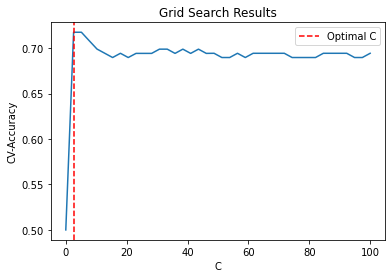

In [137]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246 (C=2.57).

In [138]:
cv_results = grid_search.cv_results_

# Print the mean test score for each hyperparameter setting
print("Mean test scores:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("  - {}: {:.4f}".format(params, mean_score))

# Print the standard deviation of the test scores for each hyperparameter setting
print("Standard deviations of test scores:")
for std_score, params in zip(cv_results['std_test_score'], cv_results['params']):
    print("  - {}: {:.4f}".format(params, std_score))

Mean test scores:
  - {'C': 0.01}: 0.5000
  - {'C': 2.5738461538461537}: 0.7174
  - {'C': 5.137692307692308}: 0.7174
  - {'C': 7.701538461538462}: 0.7081
  - {'C': 10.265384615384615}: 0.6989
  - {'C': 12.829230769230769}: 0.6943
  - {'C': 15.393076923076924}: 0.6896
  - {'C': 17.95692307692308}: 0.6943
  - {'C': 20.520769230769233}: 0.6896
  - {'C': 23.084615384615386}: 0.6942
  - {'C': 25.64846153846154}: 0.6942
  - {'C': 28.212307692307693}: 0.6942
  - {'C': 30.77615384615385}: 0.6988
  - {'C': 33.339999999999996}: 0.6988
  - {'C': 35.90384615384615}: 0.6942
  - {'C': 38.4676923076923}: 0.6988
  - {'C': 41.03153846153846}: 0.6942
  - {'C': 43.59538461538462}: 0.6988
  - {'C': 46.15923076923077}: 0.6942
  - {'C': 48.723076923076924}: 0.6943
  - {'C': 51.286923076923074}: 0.6896
  - {'C': 53.85076923076923}: 0.6896
  - {'C': 56.41461538461538}: 0.6943
  - {'C': 58.97846153846154}: 0.6896
  - {'C': 61.542307692307695}: 0.6943
  - {'C': 64.10615384615386}: 0.6943
  - {'C': 66.67}: 0.694

In [139]:
# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.7174418604651163
Standard Deviation of Accuracy: 0.08284424711886919
Mean Cross-Validation Precision - 1: 0.7365629984051036
Standard Deviation of Precision - 1: 0.10295667324267378
Mean Cross-Validation Recall - 1: 0.696969696969697
Standard Deviation of Recall - 1: 0.12729775646931646
Mean Cross-Validation F1-score - 1: 0.7091664925217184
Standard Deviation of F1-score - 1: 0.08873892330716258


In [140]:
precision_scores_1 

array([0.78947368, 0.77272727, 0.66666667, 0.875     , 0.57894737])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [141]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.717478835978836
Standard Deviation of Precision - 0: 0.09859749305362864
Mean Cross-Validation Recall - 0: 0.7411255411255411
Standard Deviation of Recall - 0: 0.11931571543818385
Mean Cross-Validation F1-score: - 0 0.72206201839747
Standard Deviation of F1-score: - 0 0.08213786765862582


In [142]:
precision_scores_0

array([0.72      , 0.80952381, 0.8125    , 0.7037037 , 0.54166667])

In [143]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=1000, warm_start=True, intercept_scaling=10000.0, C=2.57)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

Liblinear failed to converge, increase the number of iterations.


              precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.74      0.78      0.76        36

    accuracy                           0.75        72
   macro avg       0.75      0.75      0.75        72
weighted avg       0.75      0.75      0.75        72

Numero di feature con coefficiente diverso da zero: 52
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'GATA3_Frame_Shift_Ins_406_408', 'AKT1_Missense_Mutation_17_17',
       'TMPRSS13_Missense_Mutation_77_83',

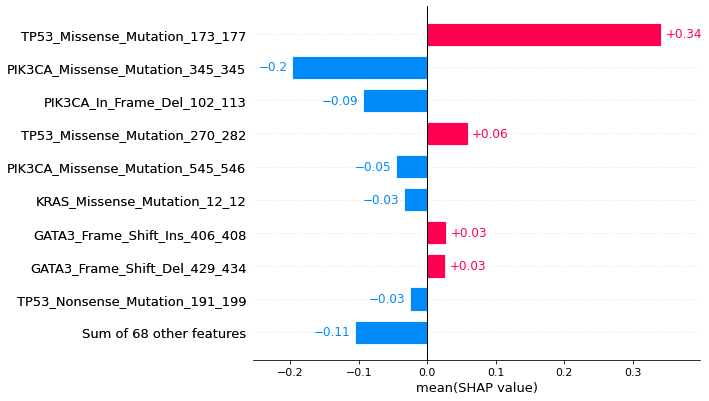

In [144]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

52 features have a coefficent different from zero.

### Study of the function Lasso

In [145]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=2.57)   

In [146]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

Liblinear failed to converge, increase the number of iterations.


LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [147]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [148]:
y_pred_simple_Lasso

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [149]:
y_test

BR-M-045                  1
X01BR015                  0
brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_119    1
                         ..
MBC_72                    0
MBC_183                   0
MBC_199                   0
MBCProject_LVSjf8h7       0
MBCProject_pktAIxFb       0
Name: Target, Length: 72, dtype: int64

## Evaluate the model with classification metrics 

In [150]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.75


In [151]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[26 10]
 [ 8 28]]


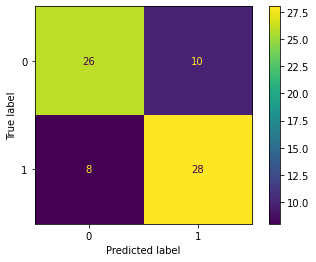

In [152]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [153]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [154]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.7368421052631579


In [155]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [156]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.7777777777777778


In [157]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [158]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7567567567567567


In [159]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [160]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

28

In [161]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

26

In [162]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

10

In [163]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

8

In [164]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.5007733956671915


In [165]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'GATA3_Frame_Shift_Ins_308_335',
 'PIK3CA_Missense_Mutation_545_546',
 'ERBB2_Missense_Mutation_767_777',
 'GATA3_Splice_Site_308_335',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'GATA3_Frame_Shift_Ins_406_408',
 'AKT1_Missense_Mutation_17_17',
 'TMPRSS13_Missense_Mutation_77_83',
 'TP53_Missense_Mutation_191_199',
 'DNAH14_Missense_Mutation_143_288',
 'GATA3_Frame_Shift_Ins_429_434',
 'SF3B1_Missense_Mutation_700_700',
 'GATA3_Frame_Shift_Del_429_434',
 'PTEN_Frame_Shift_Del_317_318',
 'TP53_Frame_Shift_Del_191_199',
 'GATA3_Frame_Shift_Del_308_335',
 'DDX5_Missense_Mutation_134_141',
 'KRAS_Missense_Mutation_12_12',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_191_199',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Frame_Shift_Del_270_282',

In [166]:
len(feature_names_lista_simple_Lasso)

52

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  10.265384615384615
Best cross-validation score:  0.722093023255814


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

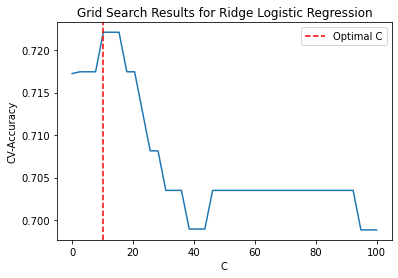

In [167]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 0.097 (C=10.265).

### Compute the classification metrics on the cross-validation results 

In [168]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.722093023255814
Standard Deviation of Accuracy: 0.09675648401262663
Mean Cross-Validation Precision - 1: 0.7372237411711097
Standard Deviation of Precision - 1: 0.10469430760822415
Mean Cross-Validation Recall - 1: 0.7056277056277056
Standard Deviation of Recall - 1: 0.09836465716659559
Mean Cross-Validation F1-score - 1: 0.7184482455214163
Standard Deviation of F1-score - 1: 0.09029933252050272


In [169]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7142930052403736
Standard Deviation of Precision - 0: 0.10275613482530893
Mean Cross-Validation Recall - 0: 0.7398268398268398
Standard Deviation of Recall - 0: 0.12334548099399567
Mean Cross-Validation F1-score: - 0 0.7244529603050395
Standard Deviation of F1-score: - 0 0.10411553683616823


## Ridge on the test set

In [170]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=10.265)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        36
           1       0.74      0.81      0.77        36

    accuracy                           0.76        72
   macro avg       0.77      0.76      0.76        72
weighted avg       0.77      0.76      0.76        72

Numero di feature con coefficiente diverso da zero: 74
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'GATA3_Frame_Shift_Ins_406_408', 'AKT1_Missense_Mutation_17_17',
       'TMPRSS13_Missense_Mutation_77_83',

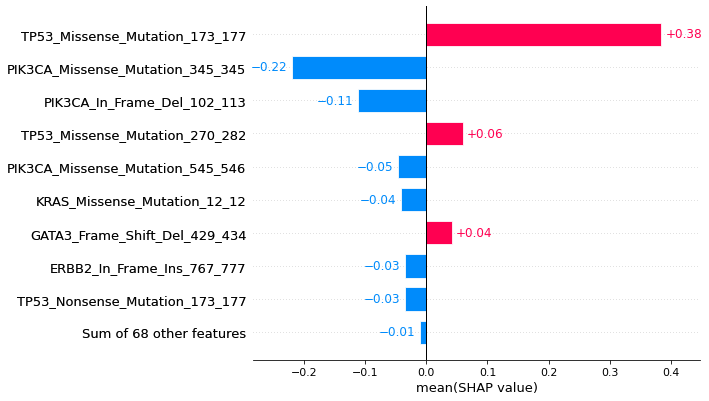

In [171]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [172]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=10.265)

In [173]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=10.265, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [174]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [175]:
y_pred_simple_Ridge

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [176]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7638888888888888


In [177]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[26 10]
 [ 7 29]]


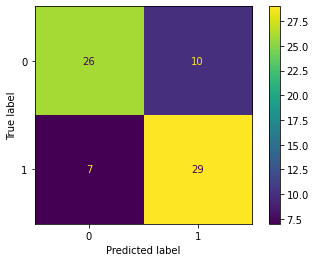

In [178]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [179]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.7435897435897436


In [180]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.8055555555555556


In [181]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.7733333333333334


In [182]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

29

In [183]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

26

In [184]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

10

In [185]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

7

In [186]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.5296199396711575


# Full Logistic Regression

## Cross-validation

In [187]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.72727273 0.74418605 0.69767442 0.74418605 0.51162791]
Mean CV Accuracy: 0.6849894291754757


In [188]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.6849894291754757
Standard Deviation of Accuracy: 0.08833060923818682
Mean Cross-Validation Precision - 1: 0.6986352380214274
Standard Deviation of Precision - 1: 0.10685095301791354
Mean Cross-Validation Recall - 1: 0.6874458874458874
Standard Deviation of Recall - 1: 0.10928999905003127
Mean Cross-Validation F1-score - 1: 0.68603239506894
Standard Deviation of F1-score - 1: 0.0778209948048501


In [189]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.6893040293040293
Standard Deviation of Precision - 0: 0.10332330211148522
Mean Cross-Validation Recall - 0: 0.6848484848484848
Standard Deviation of Recall - 0: 0.1498210798013733
Mean Cross-Validation F1-score: - 0 0.6793194040035135
Standard Deviation of F1-score: - 0 0.10423827253698968


## Full Logistic Regression on the test set 

In [190]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [191]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.74      0.78      0.76        36

    accuracy                           0.75        72
   macro avg       0.75      0.75      0.75        72
weighted avg       0.75      0.75      0.75        72



### Study of the full logistic regression function

In [192]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [193]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [194]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [195]:
y_pred_full_logreg

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [196]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.75


In [197]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[26 10]
 [ 8 28]]


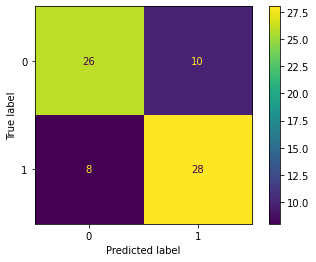

In [198]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [199]:
print("Precision ", precision(cm_full_logreg))

Precision  0.7368421052631579


In [200]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.7777777777777778


In [201]:
print("F1:", f1(cm_full_logreg))

F1: 0.7567567567567567


In [202]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

28

In [203]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

26

In [204]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

10

In [205]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

8

In [206]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.5007733956671915


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 10.265384615384615
Best cv accuracy: 0.7082452431289641


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

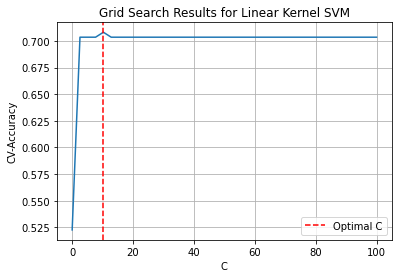

In [207]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 10.265

### Compute the classification metrics on the cross-validation results

In [208]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.7082452431289641
Standard Deviation of Accuracy: 0.06866318107090581
Mean Cross-Validation Precision - 1: 0.707070707070707
Standard Deviation of Precision - 1: 0.06900919617129699
Mean Cross-Validation Recall - 1: 0.7246753246753246
Standard Deviation of Recall - 1: 0.1119146001184962
Mean Cross-Validation F1-score - 1: 0.711038961038961
Standard Deviation of F1-score - 1: 0.06927570248627657


In [209]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.72287343358396
Standard Deviation of Precision - 0: 0.09719489974985086
Mean Cross-Validation Recall - 0: 0.6943722943722943
Standard Deviation of Recall - 0: 0.0962305627561907
Mean Cross-Validation F1-score: - 0 0.7028775544375255
Standard Deviation of F1-score: - 0 0.07249715403111572


# Linear SVM on the test set 

In [210]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=10.265)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [211]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.74      0.69      0.71        36
           1       0.71      0.75      0.73        36

    accuracy                           0.72        72
   macro avg       0.72      0.72      0.72        72
weighted avg       0.72      0.72      0.72        72



### Study of the Linear SVM function

In [212]:
clf_linear_svm = SVC(kernel='linear', C=10.265)

In [213]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=10.265, kernel='linear')

In [214]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [215]:
y_pred_linear_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [216]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7222222222222222


In [217]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[25 11]
 [ 9 27]]


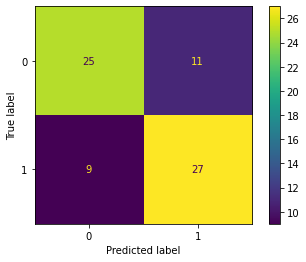

In [218]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [219]:
print("Precision ", precision(cm_linear_svm))

Precision  0.7105263157894737


In [220]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.75


In [221]:
print("F1:", f1(cm_linear_svm))

F1: 0.7297297297297298


In [222]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

27

In [223]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

25

In [224]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

11

In [225]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

9

In [226]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.4451319072597258


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [227]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 100.0
Best degree: 3
Best coef0: -5.0
Best cv accuracy: 0.7219873150105709


### Compute the classification metrics on the cross-validation results

In [228]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.7219873150105709
Standard Deviation of Accuracy: 0.04527473160754529
Mean Cross-Validation Precision - 1: 0.712368530020704
Standard Deviation of Precision - 1: 0.07265959649976582
Mean Cross-Validation Recall - 1: 0.7692640692640692
Standard Deviation of Recall - 1: 0.0625777004314897
Mean Cross-Validation F1-score - 1: 0.7350852728611417
Standard Deviation of F1-score - 1: 0.03311635030470078


In [229]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.7473333333333334
Standard Deviation of Precision - 0: 0.050614007722939516
Mean Cross-Validation Recall - 0: 0.6766233766233766
Standard Deviation of Recall - 0: 0.1126506412581893
Mean Cross-Validation F1-score: - 0 0.7045664871751829
Standard Deviation of F1-score: - 0 0.06411386488132767


## Polynomial SVM on the test set 

In [230]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=100, degree=3, coef0=-5)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [231]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.72      0.81      0.76        36

    accuracy                           0.75        72
   macro avg       0.75      0.75      0.75        72
weighted avg       0.75      0.75      0.75        72



### Study of the Polynomial SVM function

In [232]:
clf_poly_svm = SVC(kernel='poly', C=100, degree=3, coef0=-5)

In [233]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=100, coef0=-5, kernel='poly')

In [234]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [235]:
y_pred_poly_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [236]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.75


In [237]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[25 11]
 [ 7 29]]


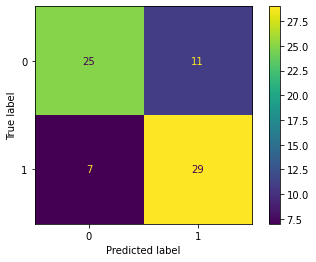

In [238]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [239]:
print("Precision ", precision(cm_poly_svm))

Precision  0.725


In [240]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.8055555555555556


In [241]:
print("F1:", f1(cm_poly_svm))

F1: 0.7631578947368423


In [242]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

29

In [243]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

25

In [244]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

11

In [245]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

7

In [246]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.5031152949374527


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [247]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 75.00025
Best gamma: 0.001
Best cv accuracy: 0.7174418604651163


### Compute the classification metrics on the cross-validation results

In [248]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.7174418604651163
Standard Deviation of Accuracy: 0.10475447097260661
Mean Cross-Validation Precision - 1: 0.7068744927184129
Standard Deviation of Precision - 1: 0.10462508255074494
Mean Cross-Validation Recall - 1: 0.7606060606060606
Standard Deviation of Recall - 1: 0.1313451588679395
Mean Cross-Validation F1-score - 1: 0.7280038010769718
Standard Deviation of F1-score - 1: 0.10113538424629848


In [249]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.7460117137764196
Standard Deviation of Precision - 0: 0.12282033297218405
Mean Cross-Validation Recall - 0: 0.674891774891775
Standard Deviation of Recall - 0: 0.1385849450625673
Mean Cross-Validation F1-score: - 0 0.7017067168242981
Standard Deviation of F1-score: - 0 0.1142388910669209


## Radial SVM on the test set 

In [250]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=75, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [251]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        36
           1       0.69      0.75      0.72        36

    accuracy                           0.71        72
   macro avg       0.71      0.71      0.71        72
weighted avg       0.71      0.71      0.71        72



### Study of the Radial SVM function

In [252]:
clf_radial_svm = SVC(kernel='rbf', C=75, gamma=0.001)

In [253]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=75, gamma=0.001)

In [254]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [255]:
y_pred_radial_svm

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [256]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7083333333333334


In [257]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[24 12]
 [ 9 27]]


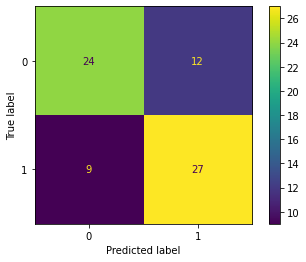

In [258]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [259]:
print("Precision ", precision(cm_radial_svm))

Precision  0.6923076923076923


In [260]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.75


In [261]:
print("F1:", f1(cm_radial_svm))

F1: 0.7199999999999999


In [262]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

27

In [263]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

24

In [264]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

12

In [265]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

9

In [266]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.4181210050035454


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [267]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 25, 'n_estimators': 100}
Best cross-validation score (accuracy): 0.7267441860465117
OOB score of best model: 0.7129629629629629


### Compute the classification metrics on the cross-validation results 

In [268]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.7267441860465117
Standard Deviation of Accuracy: 0.09258618249950878
Mean Cross-Validation Precision - 1: 0.7148436308161709
Standard Deviation of Precision - 1: 0.08270418966019384
Mean Cross-Validation Recall - 1: 0.7515151515151516
Standard Deviation of Recall - 1: 0.14660823646872131
Mean Cross-Validation F1-score - 1: 0.7284167570882671
Standard Deviation of F1-score - 1: 0.10419373595416073


In [269]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.7526111111111111
Standard Deviation of Precision - 0: 0.11829206374765389
Mean Cross-Validation Recall - 0: 0.7034632034632035
Standard Deviation of Recall - 0: 0.08595008887155478
Mean Cross-Validation F1-score: - 0 0.7220726666639321
Standard Deviation of F1-score: - 0 0.08421103283990217


In [270]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=25, n_estimators=100, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [271]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.72      0.81      0.76        36

    accuracy                           0.75        72
   macro avg       0.75      0.75      0.75        72
weighted avg       0.75      0.75      0.75        72



### Study the Random Forest function

In [272]:
clf_rf = RandomForestClassifier(max_features=25, n_estimators=100, random_state=123)

In [273]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=25, random_state=123)

In [274]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [275]:
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [276]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.75


In [277]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[25 11]
 [ 7 29]]


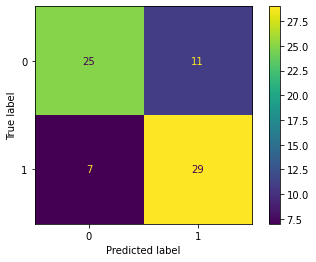

In [278]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [279]:
print("Precision ", precision(cm_rf))

Precision  0.725


In [280]:
print("Recall:", recall(cm_rf))

Recall: 0.8055555555555556


In [281]:
print("F1:", f1(cm_rf))

F1: 0.7631578947368423


In [282]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

29

In [283]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

25

In [284]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

11

In [285]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

7

In [286]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.5031152949374527


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [287]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.1, 0.3, 0.4, 0.5],
    'max_depth': [6, 8, 9, 10],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.1
Best Max Depth: 8
Best Number of Trees: 100
Best Accuracy: 0.6897463002114165


### Compute the classification metrics on the cross-validation results 

In [288]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.6897463002114165
Standard Deviation of Accuracy: 0.0854512397196016
Mean Cross-Validation Precision - 1: 0.7282163742690058
Standard Deviation of Precision - 1: 0.10688364422311963
Mean Cross-Validation Recall - 1: 0.6121212121212121
Standard Deviation of Recall - 1: 0.08542958534056458
Mean Cross-Validation F1-score - 1: 0.6639537869062901
Standard Deviation of F1-score - 1: 0.08961270723180942


In [289]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.664074074074074
Standard Deviation of Precision - 0: 0.07742282320357526
Mean Cross-Validation Recall - 0: 0.7683982683982684
Standard Deviation of Recall - 0: 0.09496221356326416
Mean Cross-Validation F1-score: - 0 0.7117098365710761
Standard Deviation of F1-score: - 0 0.08157743239163188


In [290]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=8, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [291]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.75      0.71        36
           1       0.72      0.64      0.68        36

    accuracy                           0.69        72
   macro avg       0.70      0.69      0.69        72
weighted avg       0.70      0.69      0.69        72



### Study the eXtreme Gradient Boosting function

In [292]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100, max_depth=8, random_state=123) 

In [293]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [294]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [295]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.6944444444444444


In [296]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[27  9]
 [13 23]]


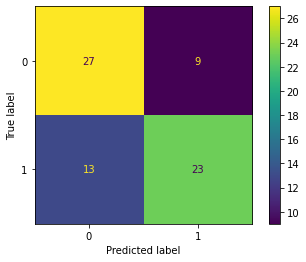

In [297]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [298]:
print("Precision ", precision(cm_xgb))

Precision  0.71875


In [299]:
print("Recall:", recall(cm_xgb))

Recall: 0.6388888888888888


In [300]:
print("F1:", f1(cm_xgb))

F1: 0.676470588235294


In [301]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

23

In [302]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

27

In [303]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

9

In [304]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

13

In [305]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.3913118960624632
